# Análisis de índices y sectores

Es posible resumir el rendimiento de distintos segmentos del mercado de acciones mediante la creación de **índices**: portafolios hipotéticos formados por una gran cantidad de activos. El cálculo del valor de los índices se calcula a partir de la evolución de los precios de sus constituyentes. Esto es muy útil para las personas que invierten, ya que les da una idea general de la *salud del mercado* y además permite hacer comparaciones con sus estrategias de inversión (está acción se denomina *benchmarking*).

Los 3 índices de acciones de Estados Unidos más conocidos son:
- Dow Jones Industrial Average (DJIA),
- S&P 500 Index y
- Nasdaq Composite Index.

## El Índice S&P 500
El *Standard and Poor's 500 Index* es un índice compuesto por las 500 empresas públicas con mayor capitalización de mercado de EE.UU. La capitalización de mercado (market cap) es el valor total de mercado que tienen la totalidad de las acciones de una compañía, lo que nos da una idea rápida del tamaño de la misma (solamente necesitamos multiplicar el valor de su acción por la cantidad de acciones existentes). En [este link](https://www.investopedia.com/top-10-s-and-p-500-stocks-by-index-weight-4843111) pueden ver cuáles son las 10 empresas top en el S&P500 al 4 de junio de 2021.

No siempre es posible invertir directamente en un índice, pero existen numerosas compañías que crean Fondos de Inversión que se dedican a seguir estos índices y es posible que las personas inviertan en ellos. Este tipo de instrumentos es muy importante porque le permite a los pequeños inversores diversificar su cartera de inversiones sin tener una cantidad enorme de dinero para comprar acciones de todas las empresas que componen los índices. En EE.UU, estos tipos de fondos son llamados Exchange Traded Funds (ETFs) y son un poco similares a los Fondos Comunes de Inversión locales (FCI). El ETF más conocido para invertir en el S&P500 es el SPDR S&P 500 ETF (su ticker es **SPY**) y lo podemos seguir en nuestro DataReader.

In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import yfinance as yf # Agrego esto # pip install yfinance --upgrade --no-cache-dir
import numpy as np # Agrego esto
import seaborn as sns

In [2]:
#------Desestimo lo de arriba porque no corre---------------
# tickers = ['SPY']

# start_date = '2000-01-01'
# end_date = '2020-12-31'

# data.DataReader(
#     tickers,
#     start=start_date, 
#     end=end_date, 
#     data_source='yahoo',
# )["Adj Close"].plot(figsize=(16,9))
#------Desestimo lo de arriba porque no corre---------------

yf.pdr_override()

# download dataframe
start_date = "2000-01-01"
end_date = "2021-06-04"
data_spy = data.get_data_yahoo("SPY", start=start_date, end=end_date)
# data_spy.head()
# data_spy['Adj Close'].plot(figsize=(16,9))
data_spy

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,97.506668,8164300
2000-01-04,143.531250,144.062500,139.640625,139.750000,93.693573,8089800
2000-01-05,139.937500,141.531250,137.250000,140.000000,93.861176,12177900
2000-01-06,139.625000,141.500000,137.750000,137.750000,92.352676,6227200
2000-01-07,140.312500,145.750000,140.062500,145.750000,97.716209,8066500
...,...,...,...,...,...,...
2021-05-27,420.170013,420.720001,418.989990,419.290009,417.922729,56707700
2021-05-28,420.970001,421.250000,419.790009,420.040009,418.670288,58520200
2021-06-01,422.570007,422.720001,419.200012,419.670013,418.301514,54216600


# Qué acciones componen actualmente al S&P500?

Es posible conseguir la lista de constituyentes del S&P500 desde Wikipedia: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies. Pero también podemos obtener esta tabla directamente con Pandas!

In [3]:
# Podemos usar la función 'read_html' de Pandas, a la cual le mandamos nuestra URL y nos devuelve una lista de DataFrames que Pandas pudo rescatar desde la página.
# Vamos a usarla para obtener nuestra lista de constituyentes.
wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")

sp500 = wiki[0] # el primer DataFrame corresponde a los constituyentes del S&P500
sp500

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Chicago, Illinois",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


## Sectores
Como se puede observar en la tabla, cada compañía que cotiza públicamente en la bolsa puede ser asignada a un sector e incluso a un subsector (GICS Sector, GICS Sub-Industry).

### Ejercicios
- Cuántos distintos sectores existen actualmente entre las empresas del S&P500? Cuántas acciones por sector hay?

- Elijamos 3 sectores existentes y para cada uno de ellos, construyamos un índice con las compañías del S&P500 que pertenezcan a él y que el valor del mismo sea la suma de una acción de cada empresa del sector en el cierre ajustado (Adj Close).

- Graficar todos estos índices en un mismo lugar, junto al S&P500, para todo lo que va del 2021. Es posible que haya que normalizarlos para poder comparar mejor su rendimiento, cómo podemos hacerlo? Podemos calcular su Sharpe Ratio?

In [4]:
# 1) Análisis de sectores
n_sect = sp500['GICS Sector'].unique().shape # cantidad de sectores únicos
acciones_sect = sp500['GICS Sector'].value_counts() # cantidad de acciones por sector

print('Cantidad de sectores únicos: ', n_sect[0])
print('Cantidad de acciones por sector: ', acciones_sect)

Cantidad de sectores únicos:  11
Cantidad de acciones por sector:  Industrials               74
Information Technology    74
Financials                65
Health Care               64
Consumer Discretionary    63
Consumer Staples          32
Real Estate               29
Utilities                 28
Materials                 28
Communication Services    26
Energy                    22
Name: GICS Sector, dtype: int64


In [5]:
# 2) Creación nuevo índice

# Selección de compañías
sect_elegidos = ['Industrials', 'Financials', 'Energy']
sp500_elegidos = sp500.loc[sp500['GICS Sector'].isin(sect_elegidos)]
# snp_elegidos['GICS Sector'].unique().shape # Verifica que las compañías elegidas provengan de sólo estos 3 sectores
n_elegidos = sp500_elegidos.shape[0] # Cantidad de empresas en los sectores elegidos
comp_elegidas = list(sp500_elegidos['Security']) # Lista de compañías elegidas
tickers_comp_elegidas = list(sp500_elegidos['Symbol']) # Símbolo de compañías elegidas

print(comp_elegidas)
print(tickers_comp_elegidas)

['3M', 'Aflac', 'Alaska Air Group', 'Allegion', 'Allstate Corp', 'American Airlines Group', 'American Express', 'American International Group', 'Ameriprise Financial', 'Ametek', 'Aon', 'A. O. Smith', 'APA Corporation', 'Arthur J. Gallagher & Co.', 'Assurant', 'Baker Hughes', 'Bank of America', 'BNY Mellon', 'Berkshire Hathaway', 'BlackRock', 'Boeing Company', 'C. H. Robinson', 'Cabot Oil & Gas', 'Capital One Financial', 'Carrier Global', 'Caterpillar', 'Cboe Global Markets', 'Charles Schwab Corporation', 'Chevron Corporation', 'Chubb', 'Cincinnati Financial', 'Cintas Corporation', 'Citigroup', 'Citizens Financial Group', 'CME Group', 'Comerica', 'ConocoPhillips', 'Copart', 'CSX', 'Cummins', 'Deere & Co.', 'Delta Air Lines', 'Devon Energy', 'Diamondback Energy', 'Discover Financial Services', 'Dover Corporation', 'Eaton Corporation', 'Emerson Electric Company', 'EOG Resources', 'Equifax', 'Everest Re', 'Expeditors', 'ExxonMobil', 'Fastenal', 'FedEx', 'Fifth Third Bancorp', 'First Republ

In [5]:
# Nuevo índice creado como suma de los precios de las acciones de las compañías elegidas

from IPython.display import clear_output # Borra el printscreen en cada iteración

# --- PRUEBA BORRAR ---
# start_date = "2020-01-01"
# end_date = "2020-12-31"

tickers_comp_elegidas = ['MMM', 'ABT', 'ABBV', 'BF.B'] # 'BF.B' # PRUEBA DE JUGUETE! el que vale es el de la celda anterior
# tickers_comp_elegidas = tickers_comp_elegidas[:30] # PRUEBA DE JUGUETE! el que vale es el de la celda anterior
# --- PRUEBA BORRAR ---

# Inicialización de variables
data_no_disp = []
suma_open = 0
suma_high = 0
suma_low = 0
suma_close = 0
suma_adj_close = 0
i = 0

# Acumulación de precios mediante un bucle
for ticker in tickers_comp_elegidas:
    data_ticker = data.get_data_yahoo(ticker, start=start_date, end=end_date)
#     print(data_ticker.shape) # Se observan que los data_ticker tienen tamaños diferentes en algunos casos

    if data_ticker.empty: # Chequeo si el df está vacío
        data_no_disp.append(ticker)
#         continue
    
#     if data_ticker.values.any(): # Chequeo existencias de NaN en df. En ese caso se imputa valor nulo
#         data_ticker.fillna(0, inplace=True)
    else:
#         data_ticker.fillna(0, inplace=True)
        suma_open = data_ticker['Open'] + suma_open
        suma_high = data_ticker['High'] + suma_high
        suma_low = data_ticker['Low'] + suma_low
        suma_close = data_ticker['Close'] + suma_close
        suma_adj_close = data_ticker['Adj Close'] + suma_adj_close # Consulta: la suma la hace automáticamente coincidiendo fechas o hay que verificar esto por aparte?
    
    clear_output(wait=True) # Borra el printscreen en cada iteración
    data_ticker = [] # Reinicio variable
    i += 1 # Control de cantidad de evaluaciones

print(i)
print("Datos no disponibles: ", data_no_disp)

# S&P500 NEW
sp500_new = pd.DataFrame({'Date':suma_open.index, \
                          'Open':suma_open.values, \
                          'High':suma_high.values, \
                          'Low':suma_low.values, \
                          'Close':suma_close.values, \
                          'Adj Close':suma_adj_close.values}) # Convierte Series a DataFrame

# Considero New Index solo a columna 'Adj Close'
new_index = pd.DataFrame(data=sp500_new, columns=['Date', 'Adj Close'])
print("Cantidad NaN:", new_index['Adj Close'].isnull().sum()) # Compruebo existencia de NaN. Estos serán imputados de alguna manera o eliminados
new_index.head()

# CHEQUEAR PORQUE HAY TANTOS NAN!!!

4
Datos no disponibles:  ['BF.B']
Cantidad NaN: 3269


,Date,Adj Close
0,2000-01-03,NaN
1,2000-01-04,NaN
2,2000-01-05,NaN
3,2000-01-06,NaN
4,2000-01-07,NaN


In [41]:
data_ticker = data.get_data_yahoo(tickers_comp_elegidas, start=start_date, end=end_date)
data_ticker.head()
print(data_ticker.columns.nlevels)

# new_index_1 = data_ticker.sum(level=[0,1])
# new_index_1.head()

[*********************100%***********************]  4 of 4 completed
2


In [ ]:
# # Imputación de valores
# '''
# Se escoge como método de imputación a la asignación por vecinos más cercanos (KNNImputer).

# '''
# from sklearn.impute import KNNImputer

# new_index_imp = new_index.copy(deep=True)

# imputer = KNNImputer(n_neighbors=3)
# new_index_imp[['Adj Close']] = imputer.fit_transform(new_index_imp[['Adj Close']])
# new_index_imp['Adj Close'].isnull().sum() # Compruebo existencia de NaN. Estos serán imputados de alguna manera

# new_index_imp['Adj Close'].plot(figsize=(16,9))
# new_index['Adj Close'].plot(figsize=(16,9))

# '''
# Luego de hacer la prueba de imputación, se observa que los valores faltantes corresponden a períodos considerables
# de tiempo y que incluso se encuentran continuados. Es por eso que la información que se pudiera imputar no se 
# estima adecuada. Se decide no realizar imputación de valores, sino que directamente se eliminarán los valores
# faltantes para evitar usar datos que lleven a conclusiones erradas. Incluso pensar en otro método de imputación,
# no llevará a resultados mejores.
# La premisa es: trabajar con los datos fieles disponibles.
# '''

# new_index.dropna(inplace=True)
# new_index_imp['Adj Close'].isnull().sum() # Compruebo existencia de NaN. Estos serán imputados de alguna manera

In [8]:
# Preparación de df para graficación
data_spy.reset_index(level='Date', inplace=True) # Reseteo MultiIndex (Date en este caso y la guardaré como columna)
data_spy.set_index('Date') # Indico que el index será 'Date'
data_spy.head(3)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,148.25000,148.25000,143.875000,145.4375,97.506668,8164300
1,2000-01-04,143.53125,144.06250,139.640625,139.7500,93.693573,8089800
2,2000-01-05,139.93750,141.53125,137.250000,140.0000,93.861176,12177900


In [9]:
# Estandarización para comparación (Dejamos el término normalizar para conversión a distribución con dicho nombre)
'''
Como el nuevo índice es una suma de todas los precios del cierre ajustado de las acciones de las compañías filtradas por sector,
este valor puede ser de orden diferente a los valores del ticker 'SPY'. Es por eso que se hace este procedimiento
a fin de poder comparar sus comportamientos.
'''
from sklearn.preprocessing import StandardScaler

data_spy_scl = data_spy.copy(deep=True)
new_index_scl = new_index.copy(deep=True)

scaler = StandardScaler() # z = (x - u) / s
data_spy_scl['Adj Close'] = scaler.fit_transform(np.array(data_spy_scl['Adj Close'].values.tolist()).reshape(-1, 1))  # StandarScaler requiere matrix 2D. Cómo se tiene es un vector de Series (1D), lo paso a array y hago reshape
new_index_scl['Adj Close'] = scaler.fit_transform(np.array(new_index_scl['Adj Close'].values.tolist()).reshape(-1, 1)) 
new_index_scl.head()

,Date,Adj Close
0,1999-12-31,NaN
1,2000-01-03,NaN
2,2000-01-04,NaN
3,2000-01-05,NaN
4,2000-01-06,NaN


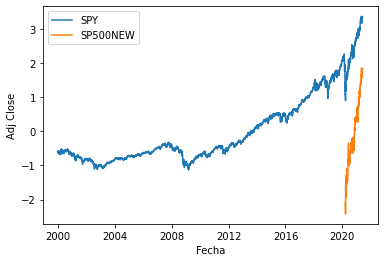

In [10]:
# 3) Gráficación 

# data_spy['Adj Close'].plot(figsize=(16,9))
# new_index['Adj Close'].plot(figsize=(16,9))

# Gráfico de Variación de Cierre Ajustado
plt.plot('Date', 'Adj Close', data=data_spy_scl, label='SPY')
plt.plot('Date', 'Adj Close', data=new_index_scl, label='SP500NEW')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Adj Close')
plt.show()


Rendimiento data_spy:  145.02535554380094
Rendimiento new_index:  18210.163167597035


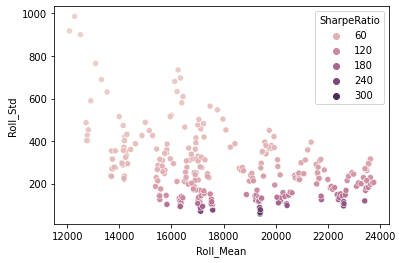

In [11]:
# Determinación del rendimiento para cada índice (trabajo sobre df original)

rend_data_spy = data_spy['Adj Close'].mean() # Analizar si esto es necesario colocar
rend_new_index = new_index['Adj Close'].mean() # Analizar si esto es necesario colocar
print("Rendimiento data_spy: ", rend_data_spy)
print("Rendimiento new_index: ", rend_new_index)

# Determinación del SharpeRatio (trabajo sobre df original)
ventana = 7

data_spy['Roll_Mean'] = data_spy['Adj Close'].rolling(ventana).mean()
data_spy['Roll_Std'] = data_spy['Adj Close'].rolling(ventana).std()
data_spy['SharpeRatio'] = data_spy['Roll_Mean'] / data_spy['Roll_Std']

new_index['Roll_Mean'] = new_index['Adj Close'].rolling(ventana).mean()
new_index['Roll_Std'] = new_index['Adj Close'].rolling(ventana).std()
new_index['SharpeRatio'] = new_index['Roll_Mean'] / new_index['Roll_Std'] 

# ax = sns.scatterplot(data=data_spy, x='Roll_Mean', y='Roll_Std', hue='SharpeRatio')
ax = sns.scatterplot(data=new_index, x='Roll_Mean', y='Roll_Std', hue='SharpeRatio')

## Cisnes Negros

Un Cisne Negro (Black Swan) es un evento impredecible que trae consecuencias potencialmente muy severas. Estos eventos tienen como características principales su extrema rareza, impacto severo y la idea de que, mirando al pasado, era obvio que iban a ocurrir.

Un ejemplo famoso de cisne negro en el mercado estadounidense fue la "Burbuja de las DotCom": Una rápida subida de valor en las acciones de las empresas de base tecnológica hizo que el índice Nasdaq subiera su valor de 1000 a más de 5000 en un período de 5 años (1995-2000). En 2001, el índice tardó aproximadamente 7 meses en bajar un 76%, volviendo a una valoración de 1136, con pérdidas del 80% del valor en casos como los de Cisco, Intel y Oracle. El índice tardó luego 15 años en volver al valor de finales del 2000. Para más información, se puede visitar el [siguiente link](https://www.investopedia.com/terms/d/dotcom-bubble.asp).

Para identificar cisnes negros en el mercado financiero, podemos usar los retornos diarios de las acciones y ajustar una distribución de probabilidad normal sobre los mismos. Aquellos retornos que estén por encima o por debajo de 3 o más desviaciones estándar pueden ser considerados cisnes negros.

### Ejercicios
- Cuántos de estos eventos existieron en el S&P500 desde el año 2000 hasta la fecha y cuándo ocurrieron esos eventos? Es posible encontrar algunas noticias relacionadas con esas fechas?

- Supongamos que invertimos U$D 1.000 en el SPY a comienzos del 2000 y que además teníamos una bola de cristal, pudiendo dejar de invertir nuestro dinero justo el día anterior a un cisne negro y reinvertirlo el día después. Cuánto dinero tendríamos hoy?


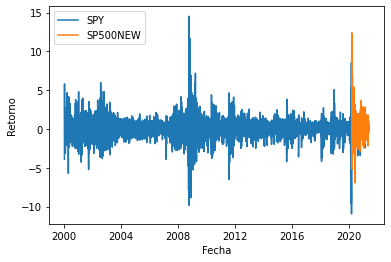

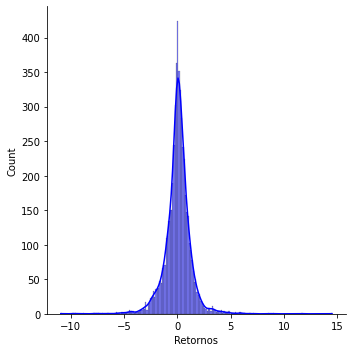

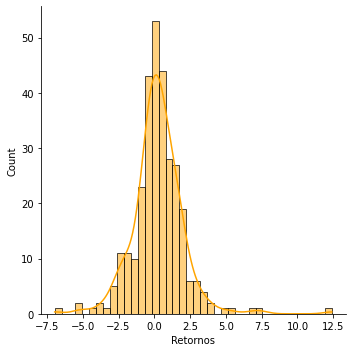

In [12]:
# 1) Detección de eventos

# Determinación de retornos (sobre Adj Close)

data_spy['Retornos'] = data_spy['Adj Close'].pct_change()*100
sp500_new['Retornos'] = sp500_new['Adj Close'].pct_change()*100

# Gráfico de retornos diarios
plt.plot('Date', 'Retornos', data=data_spy, label='SPY')
plt.plot('Date', 'Retornos', data=sp500_new, label='SP500NEW')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Retorno')
plt.show()

ax = sns.displot(data=data_spy, x='Retornos', kde=True, color='blue')
ax = sns.displot(data=sp500_new, x='Retornos', kde=True, color='orange')

mu= 0.034775352896468235 std= 1.2473019240310785
(5389, 11) (5346, 11)
Cantidad Eventos:  43
Fechas Eventos:  1      2000-01-04
72     2000-04-14
299    2001-03-12
426    2001-09-17
668    2002-09-03
1796   2007-02-27
2187   2008-09-15
2189   2008-09-17
2197   2008-09-29
2202   2008-10-06
2203   2008-10-07
2205   2008-10-09
2209   2008-10-15
2214   2008-10-22
2216   2008-10-24
2224   2008-11-05
2225   2008-11-06
2229   2008-11-12
2231   2008-11-14
2234   2008-11-19
2235   2008-11-20
2241   2008-12-01
2274   2009-01-20
2289   2009-02-10
2293   2009-02-17
2302   2009-03-02
2305   2009-03-05
2336   2009-04-20
2915   2011-08-04
2917   2011-08-08
2919   2011-08-10
2925   2011-08-18
3934   2015-08-24
4551   2018-02-05
5069   2020-02-27
5076   2020-03-09
5078   2020-03-11
5079   2020-03-12
5081   2020-03-16
5083   2020-03-18
5085   2020-03-20
5093   2020-04-01
5142   2020-06-11
Name: Date, dtype: datetime64[ns]
Valores BS:  1       -3.910599
72      -5.719233
299     -4.280082
426     -5.2248

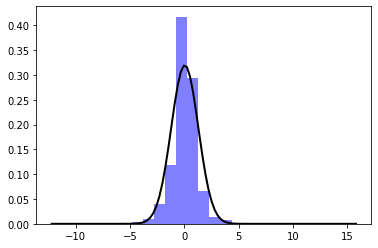

In [13]:
# ANALISIS PARA SPY

# Ajuste de una función de densidad de probabilidad normal (¿se asemeja? podría hacer test: Shapiro-Wilk, K^2 de D’Agostino)

# Con librería
from scipy.stats import norm

# mu, std = norm.fit(data_spy['Retornos'].dropna()) # Agrego dropna porque sino me tira error. Este paso es lo mismo que hacer: data_spy['Retornos'].mean() y data_spy['Retornos'].std()

# Manual
mu = data_spy['Retornos'].mean()
std = data_spy['Retornos'].std()

print("mu=", mu, "std=", std)

# Histograma
plt.hist(data_spy['Retornos'], bins=25, density=True, alpha=0.5, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) # Ajuste de PDF
plt.plot(x, p, 'k', linewidth=2)

# Eventos (Black Swans) # DUDA: UNA BLACK SWAN ES UN EVENTO TANTO EN PERDIDA COMO EN GANANCIA? O SOLO EN PERDIDA?
umbral = mu + 3*std

# posicion = abs(data_spy['Retornos']) >= umbral # Black Swan tanto en ganancia como pérdida
posicion = data_spy['Retornos'] <= -umbral # Black Swan solo en pérdida

cantidad_bs = data_spy[posicion]['Retornos'].count()
fechas_bs = data_spy[posicion]['Date']
valores_bs = data_spy[posicion]['Retornos']

# Df sin Black Swans
data_spy_clean = data_spy.copy(deep=True)
data_spy_clean = data_spy_clean.loc[~posicion] # Tomo las entradas donde no ocurren eventos [~posicion]

print(data_spy.shape, data_spy_clean.shape)

print("Cantidad Eventos: ", cantidad_bs)
print("Fechas Eventos: ", fechas_bs)
print("Valores BS: ", valores_bs)

# Pendiente: Buscar noticias para estas fechas

In [14]:
# 2) Simulación de resultados en el período con y sin Black Swans

# CREO UN FUNCION PARA CALCULO DEL RENDIMIENTO NETO
# ---------------------------------------------------------------------------------------
def rendimiento_neto(inversion, retornos):
    '''
    Entrada: - inversion: [number] monto de inversión inicial.
             - retornos: [pandas.DataFrame] retornos unitarios (no %) del precio 'Adj close' o eventualmente 'Close' por día.
                        o ya procesado con pct_change. Cuidado de introducir en este caso valores unitarios, no porcentuales.
             - pct_change: [bool] Indica si quiere procesar "valores" con pct_change. Por defecto: False
    Salida: - rendimiento neto de la inversión en el período.
    '''
    n = retornos.shape[0]
    
    for i in range(0, n): # Pensar este loop para vectorizar...

        if i == 0:
            neto = inversion
        else:
            neto = neto*(1 + retornos.iloc[i]) # neto + retornos.iloc[i] * neto
    
    return neto
# ---------------------------------------------------------------------------------------

inversion_inicial = 1000

# Resultado sin filtrar Black Swans
resultado_data_spy = rendimiento_neto(inversion_inicial, data_spy['Retornos']/100) # División por 100 para asignar valores unitarios
print("Rendimiento neto con Black Swans:", resultado_data_spy)

# Resultado filtrando Black Swans
resultado_data_spy_clean = rendimiento_neto(inversion_inicial, data_spy_clean['Retornos']/100) # División por 100 para asignar valores unitarios
print("Rendimiento neto sin Black Swans:", resultado_data_spy_clean)

Rendimiento neto con Black Swans: 4280.778198230823
Rendimiento neto sin Black Swans: 48459.209136182326


mu= 0.24984137746377735 std= 1.7935462847638246
(5390, 7) (5389, 7)
Cantidad Eventos:  1
Fechas Eventos:  5143   2020-06-11
Name: Date, dtype: datetime64[ns]
Valores BS:  5143   -6.963661
Name: Retornos, dtype: float64


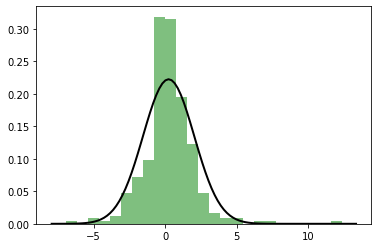

In [16]:
# ANALISIS PARA NEW_INDEX

# Ajuste de una función de densidad de probabilidad normal (¿se asemeja? podría hacer test: Shapiro-Wilk, K^2 de D’Agostino)

# Con librería
# mu, std = norm.fit(new_index['Retornos'].dropna()) # Agrego dropna porque sino me tira error.

# Manual
mu = sp500_new['Retornos'].mean()
std = sp500_new['Retornos'].std()

print("mu=", mu, "std=", std)

# Histograma
plt.hist(sp500_new['Retornos'], bins=25, density=True, alpha=0.5, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) # Ajuste de PDF
plt.plot(x, p, 'k', linewidth=2)


# Eventos (Black Swans) # DUDA: UNA BLACK SWAN ES UN EVENTO TANTO EN PERDIDA COMO EN GANANCIA? O SOLO EN PERDIDA?
umbral = mu + 3*std

# posicion = abs(new_index['Retornos']) >= umbral # Black Swan tanto en ganancia como pérdida
posicion = sp500_new['Retornos'] <= -umbral # Black Swan solo en pérdida

cantidad_bs = sp500_new[posicion]['Retornos'].count()
fechas_bs = sp500_new[posicion]['Date']
valores_bs = sp500_new[posicion]['Retornos']

# Df sin Black Swans
sp500_new_clean = sp500_new.copy(deep=True)
sp500_new_clean = sp500_new_clean.loc[~posicion] # Tomo las entradas donde no ocurren eventos [~posicion]

print(sp500_new.shape, sp500_new_clean.shape)

print("Cantidad Eventos: ", cantidad_bs)
print("Fechas Eventos: ", fechas_bs)
print("Valores BS: ", valores_bs)

# Pendiente: Buscar noticias para estas fechas

In [17]:
# 2) Simulación de resultados en el período con y sin Black Swans

inversion_inicial = 1000

# Resultado sin filtrar Black Swans
resultado_sp500_new = rendimiento_neto(inversion_inicial, sp500_new['Retornos']/100) # División por 100 para asignar valores unitarios
print("Rendimiento neto con Black Swans:", resultado_sp500_new)

# Resultado filtrando Black Swans
resultado_sp500_new_clean = rendimiento_neto(inversion_inicial, sp500_new_clean['Retornos']/100) # División por 100 para asignar valores unitarios
print("Rendimiento neto sin Black Swans:", resultado_sp500_new_clean)

# CHEQUEAR PORQUE DAN NAN!!!

Rendimiento neto con Black Swans: nan
Rendimiento neto sin Black Swans: nan


## Cómo se generan los precios diarios?

Si bien los precios con los que estamos trabajando ahora no parecen ser un volumen muy grande de datos, los mismos son resúmenes generados a partir de datos de transacciones de mercado en tiempo real todos los días, para todos los activos financieros. FINRA cuenta un poco cómo es el proceso del punto de vista del gran volumen manejado en [este link](https://technology.finra.org/articles/how-finra-processes-75-billion-market-events-daily.html).

Por lo general, los mercados de acciones permanecen abiertos durante los días hábiles desde aprox. las 11hs hasta las 17hs y durante todo ese período, para todo activo, se realizan ofertas de compra y venta de los mismos, que se van organizando automáticamente en un libro de órdenes como el de la imagen de abajo.

![order_book](https://wp.fxssi.com/wp-content/uploads/2019/04/en_post-images.jpg)

Básicamente, para cada activo, se listan todas las ofertas de compra y venta y se realiza una operación exitosamente cuando coinciden los precios.

## Timeframes

Cómo vimos en el primer práctico y en sus correcciones, es muy importante establer un marco temporal de análisis que sea consistente con la estrategia de inversión.

Para algotrading un timeframe apropiado será el análisis de milisegundos, y para una estrategia de largo plazo el análisis puede ser mensual. 

### Ejercicios

- Transformar los índices realizados en el ejercicio anterior a timeframes mensuales. 

- Para ello en cada fila de datos considerar el Open, Close, High y Low de cada mes. 

- Graficar los cierres ajustados de estas nuevas series contrastandolas contra las series diarias. 

- Comentar: ¿Qué información se gana y se pierde con este cambio? ¿Cuándo se imaginan que puede ser útil tomar esta perspectiva?

In [18]:
# 1) y 2) Transformación a ventanas mensuales
data_spy_mens = data_spy.copy(deep=True)
sp500_new_mens = sp500_new.copy(deep=True)

# data_spy_mens

ventana = 30
data_spy_mens[['Open', 'Close', 'High', 'Low', 'Adj Close']] = data_spy_mens[['Open', 'Close', 'High', 'Low', 'Adj Close']].rolling(ventana).mean()
sp500_new_mens[['Open', 'Close', 'High', 'Low', 'Adj Close']] = sp500_new_mens[['Open', 'Close', 'High', 'Low', 'Adj Close']].rolling(ventana).mean()


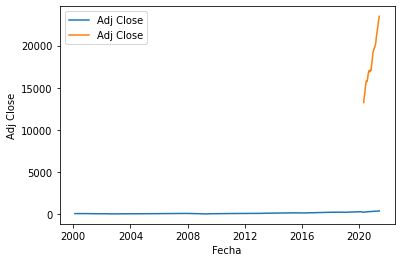

In [19]:
# 3) Graficación

# Gráfico de Cierres Ajustados
plt.plot('Date', 'Adj Close', data=data_spy_mens, label='Adj Close')
plt.plot('Date', 'Adj Close', data=sp500_new_mens, label='Adj Close')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Adj Close')
plt.show()

data_spy_mens['Retornos'] = data_spy_mens['Adj Close'].pct_change()*100
sp500_new_mens['Retornos'] = sp500_new_mens['Adj Close'].pct_change()*100


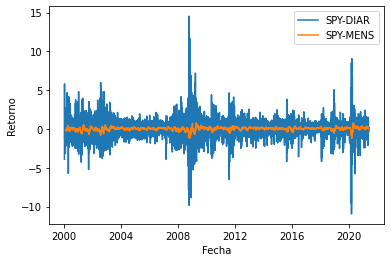

In [20]:
# Gráfico de retornos mensuales vs diarios
plt.plot('Date', 'Retornos', data=data_spy, label='SPY-DIAR')
plt.plot('Date', 'Retornos', data=data_spy_mens, label='SPY-MENS')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Retorno')
plt.show()

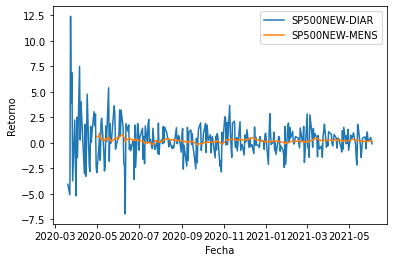

In [21]:
plt.plot('Date', 'Retornos', data=sp500_new, label='SP500NEW-DIAR')
plt.plot('Date', 'Retornos', data=sp500_new_mens, label='SP500NEW-MENS')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Retorno')
plt.show()

In [ ]:
# 4) Comentario: 
# Se observa que se pierden los picos, es decir, de alguna manera se suavizan los cisnes negros. Esto permite hacer un análisis más global a largo plazo.
# COMPLETAR!!!!